Implementation of value iteration algorithm

Consider a 4 x 4 grid as shown in Figure 1. The start state is located at the bottom left, and the target
states are (0, 3) and (3,3) with a reward of +2 and -2. All other states have a -1 reward. Possible actions
of MDP are to move left, right, up, or down. Assume the environment is stochastic. The transition
probabilities are shown in Figure 1.


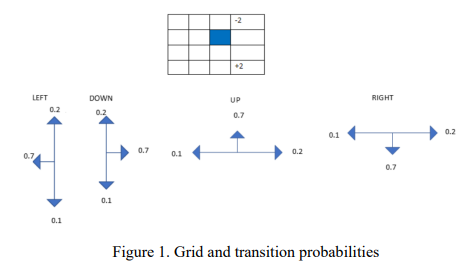

**Import Libraries**

In [ ]:
import numpy as np

**Initial**

In [ ]:
small_enough = 0.005
gamma = 0.9         
noise = 0.1  
#Define all states
all_states=[]
for i in range(4):
    for j in range(4):
            all_states.append((i,j))

In [ ]:
all_states

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [ ]:
#Rewards for each
rewards = {}
for state in all_states:
    if state == (0,3):
        rewards[state] = +2
    elif state == (3,3):
        rewards[state] = -2
    elif state == (2,2):
        rewards[state] = 0
    else:
        rewards[state] =-1


In [ ]:
rewards

{(0, 0): -1,
 (0, 1): -1,
 (0, 2): -1,
 (0, 3): 2,
 (1, 0): -1,
 (1, 1): -1,
 (1, 2): -1,
 (1, 3): -1,
 (2, 0): -1,
 (2, 1): -1,
 (2, 2): 0,
 (2, 3): -1,
 (3, 0): -1,
 (3, 1): -1,
 (3, 2): -1,
 (3, 3): -2}

In [ ]:
#Possible actions
actions = {
    (0,0):('U', 'R'), 
    (0,1):('U', 'R', 'L'),    
    (0,2):('U', 'L', 'R'),
    (0,3):('U', 'L'),
    (1,0):('D', 'U', 'R'),
    (1,1):('D', 'R', 'L', 'U'),
    (1,2):('D', 'L', 'R'),
    (1,3):('U', 'L', 'D'),
    (2,0):('U', 'D', 'R'),
    (2,1):('U', 'D', 'L'),
    (2,3):('U', 'D'),
    (3,0):('D', 'R'),
    (3,1):('L', 'D', 'R'),
    (3,2):('L', 'R'),
    (3,3):('D', 'L'),
    }

In [ ]:
actions

{(0, 0): ('U', 'R'),
 (0, 1): ('U', 'R', 'L'),
 (0, 2): ('U', 'L', 'R'),
 (0, 3): ('U', 'L'),
 (1, 0): ('D', 'U', 'R'),
 (1, 1): ('D', 'R', 'L', 'U'),
 (1, 2): ('D', 'L', 'R'),
 (1, 3): ('U', 'L', 'D'),
 (2, 0): ('U', 'D', 'R'),
 (2, 1): ('U', 'D', 'L'),
 (2, 3): ('U', 'D'),
 (3, 0): ('D', 'R'),
 (3, 1): ('L', 'D', 'R'),
 (3, 2): ('L', 'R'),
 (3, 3): ('D', 'L')}

In [ ]:
#initial policy
policy={}
for action in actions.keys():
    policy[action] = np.random.choice(actions[action])

In [ ]:
policy

{(0, 0): 'R',
 (0, 1): 'R',
 (0, 2): 'L',
 (0, 3): 'U',
 (1, 0): 'R',
 (1, 1): 'U',
 (1, 2): 'D',
 (1, 3): 'D',
 (2, 0): 'R',
 (2, 1): 'L',
 (2, 3): 'U',
 (3, 0): 'R',
 (3, 1): 'R',
 (3, 2): 'L',
 (3, 3): 'D'}

In [ ]:
#Define initial value function 
value={}
for state in all_states:
    if state in actions.keys():
        value[state] = -1
    if state ==(0,3):
        value[state]= +2
    if state == (2,2):
       value[state]= 0    
    if state == (3,3):
        value[state]=-2
    


In [ ]:
value

{(0, 0): -1,
 (0, 1): -1,
 (0, 2): -1,
 (0, 3): 2,
 (1, 0): -1,
 (1, 1): -1,
 (1, 2): -1,
 (1, 3): -1,
 (2, 0): -1,
 (2, 1): -1,
 (2, 2): 0,
 (2, 3): -1,
 (3, 0): -1,
 (3, 1): -1,
 (3, 2): -1,
 (3, 3): -2}

**a. Implement value iteration algorithm to find the optimal policy**

In [ ]:
iteration = 0
while True:
    biggest_change = 0
    for state in all_states:            
        if state in policy:
            
            previous_value = value[state]
            new_value = 0
            
            for action in actions[state]:
                if action == 'U':
                    next_action = [state[0]+1, state[1]]
                if action == 'D':
                    next_action = [state[0]-1, state[1]]
                if action == 'L':
                    next_action = [state[0], state[1]-1]
                if action == 'R':
                    next_action = [state[0], state[1]+1]
  #New Random action for transition probability
                random_value=np.random.choice([i for i in actions[state] if i != a])
                if random_value == 'U':
                    new_action = [state[0]+1, state[1]]
                if random_value == 'D':
                    new_action = [state[0]-1, state[1]]
                if random_value == 'L':
                    new_action = [state[0], state[1]-1]
                if random_value == 'R':
                    new_action = [state[0], state[1]+1]

                #Calculate the value
                next_action = tuple(next_action)
                new_action = tuple(new_action)
                v = rewards[state] + (gamma * ((1-noise)* value[next_action] + (noise * value[new_action]))) 
                if v > new_value: #Is this the best action so far? If so, keep it
                    new_value = v
                    policy[state] = a

       #Save the best of all actions for the state                                 
            value[state] = new_value
            change = max(change, np.abs(previous_value - value[state]))
         
   #See if the loop should stop now         
    if change < small_enough:
        break
    iteration += 1

              


In [ ]:
value

{(0, 0): 0,
 (0, 1): 1.1990956936878567,
 (0, 2): 2.694130196788024,
 (0, 3): 4.4245963237346135,
 (1, 0): 0,
 (1, 1): 0.15580837300386752,
 (1, 2): 1.4236294967377492,
 (1, 3): 2.6902272223374517,
 (2, 0): 0,
 (2, 1): 0,
 (2, 2): 0,
 (2, 3): 1.1790840500933362,
 (3, 0): 0,
 (3, 1): 0,
 (3, 2): 0,
 (3, 3): 0}

**b. Check the convergence of the algorithm (how many iterations?)**

In [ ]:
print("Number of iteration:", iteration)

Number of iteration: 1218


**c.Modify the state transition probability matrix by applying uniform random policy (0.25 for all
four actions)**

In [1]:
import numpy as np
import random as rm

In [ ]:
# The statespace
states = all_states

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.7,0.1,0.2],[0.2,0.7,0.1],[0.1,0.7,0.2],[0.1,0.2,0.7]]

random_probvalue=0.25